# Project Brief

### An international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

###  As a data analyst my job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country.

### Choosing the countries that are in the direst need of aid and decide how to use resources strategically and effectively.

# Importing libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,cut_tree,dendrogram
import warnings
warnings.filterwarnings('ignore')

# Importing " Country-data.csv" file 


In [2]:
# Importing Country-data.csv file 

country_data = pd.read_csv("C:\\Users\\Paunikar\\Pictures\\my project\\Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Data exploration

In [3]:
# Checking the info of the data 

# Checking the missing values and type of the data 

country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
# finding number of null values in the dataset.
country_data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
# analyzing mean as well as checking how much variance are there in the columns of the dat set.

country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Checking the shape of the data
country_data.shape

(167, 10)

## checking correlation between the features.

In [7]:
# Checking the corelation between the features 

correlation_1 = country_data.corr()
correlation_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


## Plotting the co-relation heatmap  

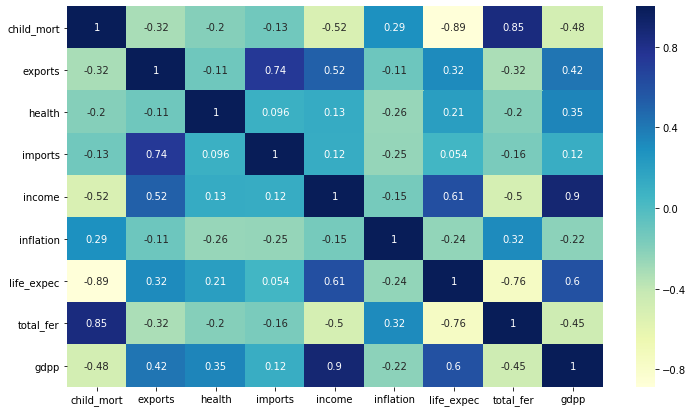

In [8]:
# Plotting the correlation heatmap

plt.figure(figsize=(12,7))
sns.heatmap(correlation_1, cmap="YlGnBu", annot=True)
plt.show()

In [9]:
# Removing the "country" column ( non numeric column )

y = country_data.pop("country")
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



# Performing the scaling operations on data

In [10]:
# Performing scaling operation on the data

scaler = StandardScaler()
countydata = country_data.copy()
x= scaler.fit_transform(countydata)
x

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# Performing the PCA operation on data

In [11]:
# From sklearn library we are importing the PCA

from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# Applying pca algo
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

### Checking the PCA Components


In [12]:
# Checking the PCA Components

pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

### Checking the variance ratios  


In [13]:
# analysing that how many components are actually explaining majoritydata.

pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

## Plotting the sckree plot.

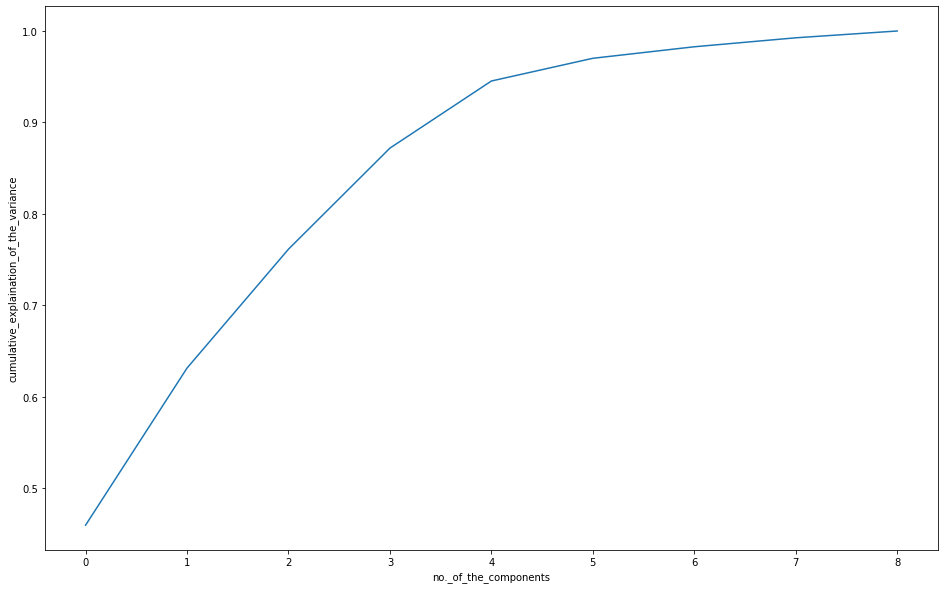

In [14]:
# Deciding how many clusters should be form
# lets see how many components will explained 95% variance of the given data by plotting.


fig = plt.figure(figsize = (16,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no._of_the_components')
plt.ylabel('cumulative_explaination_of_the_variance')
plt.show()

#### 5 Principle components are explaining more than 95% variance of data.

In [15]:
# Here we are selecting 5 principal components 

pcomponents = PCA(n_components=5, random_state=42)
pcomponents2 = pcomponents.fit_transform(x)
pcomponents2.shape

(167, 5)

##### making dataframe again having columns=["PC1", "PC2","PC3","PC4","PC5"]

In [16]:
pd.DataFrame(pca.components_[:5],index = ["PC1","PC2","PC3","PC4","PC5"])
PC_df = pd.DataFrame(pcomponents2, columns=["PC1", "PC2","PC3","PC4","PC5"])
PC_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


In [17]:
# Concating the principal components dataframe and  "country" column dataframe

PC_country = pd.concat([PC_df, y], axis=1)
PC_country.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


### We are plotting scatterplots to check the spread before removing the outliers

<Figure size 864x432 with 0 Axes>

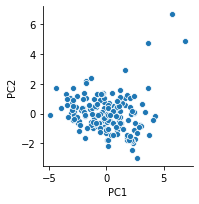

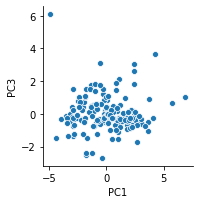

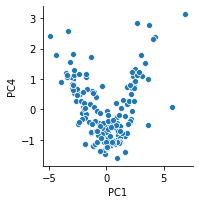

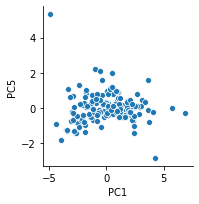

In [18]:
# plotting pairplt tosee spread of data before outlier removal
fig = plt.figure(figsize = (12,6))
list1=["PC2","PC3","PC4","PC5"]
for x in list1:
    sns.pairplot(data=PC_country, x_vars=["PC1"], y_vars=[x], size=3)
    plt.plot()


## Performing the outlier analysis on the data.

[]

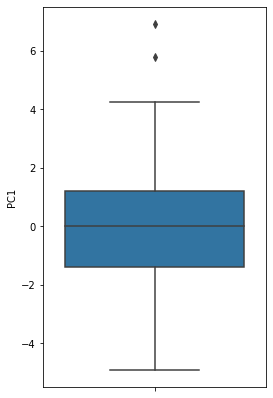

In [19]:
# Plotting the box=plot in order to check for outliers in the data.

fig = plt.figure(figsize = (4,7))
sns.boxplot(x=PC_country["PC1"],orient="v")
plt.plot()

[]

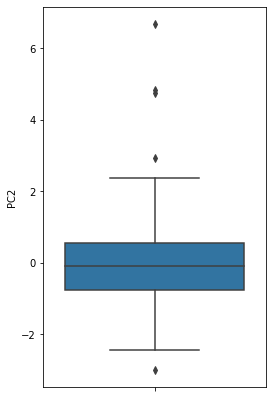

In [20]:
fig = plt.figure(figsize = (4,7))
sns.boxplot(x=PC_country["PC2"],orient="v")
plt.plot()

[]

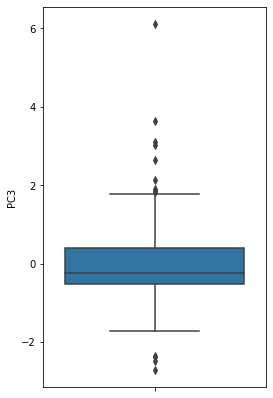

In [21]:
fig = plt.figure(figsize = (4,7))
sns.boxplot(x=PC_country["PC3"],orient="v")
plt.plot()

[]

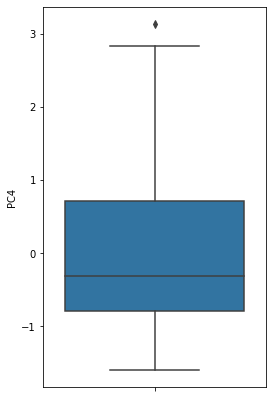

In [22]:
fig = plt.figure(figsize = (4,7))
sns.boxplot(x=PC_country["PC4"],orient="v")
plt.plot()

[]

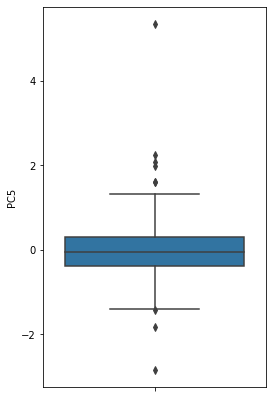

In [23]:
fig = plt.figure(figsize = (4,7))
sns.boxplot(x=PC_country["PC5"],orient="v")
plt.plot()

## Performing operation to remove outliers that are above 95% of quantile value.

#### As can be seen above there are a lot of outliers in PC2, PC3, PC5 hence removing outliers that are above 95% of quantile value as it will result in unreliable outcome and we have to find the countries that are struggling we dont need to know the countries that are performing well.

In [24]:
PC_df_2 = PC_df
PC_df_2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


{'whiskers': [<matplotlib.lines.Line2D at 0x1e8622fe668>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8622fecf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8622fe278>],
 'medians': [<matplotlib.lines.Line2D at 0x1e86231a3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e86231a710>],
 'means': []}

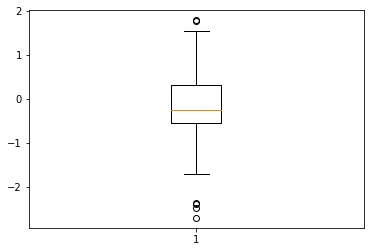

In [25]:
# Removing the high values(outliers) from  data set(PC3)

Q1 = PC_df_2.PC3.quantile(0.05)
Q3 = PC_df_2.PC3.quantile(0.95)
IQR = Q3 - Q1
PC_df_2 = PC_df_2[(PC_df_2.PC3 <= Q3)]
plt.boxplot(PC_df_2.PC3)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e862213be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e862213f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8622137f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8624719b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e862471cf8>],
 'means': []}

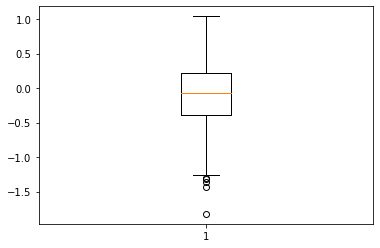

In [26]:
# Removing the high values(outliers) from data set(PC5)

Q1 = PC_df_2.PC5.quantile(0.05)
Q3 = PC_df_2.PC5.quantile(0.95)
IQR = Q3 - Q1
PC_df_2 = PC_df_2[(PC_df_2.PC5 <= Q3)]
plt.boxplot(PC_df_2.PC5)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8623be8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8623befd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8623be4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8623d46a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8623d49e8>],
 'means': []}

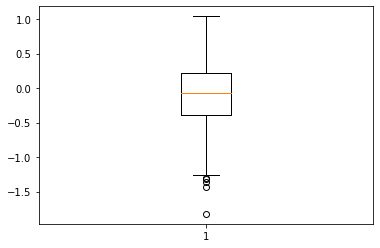

In [27]:
#Removing the high values(outliers) from data set(PC2)
Q1 = PC_df_2.PC2.quantile(0.05)
Q3 = PC_df_2.PC2.quantile(0.95)
IQR = Q3 - Q1
PC_df_2= PC_df_2[(PC_df_2.PC2 <= Q3)]
plt.boxplot(PC_df_2.PC5)

### We are plotting scatterplots to check the spread after removing the outliers

<Figure size 864x432 with 0 Axes>

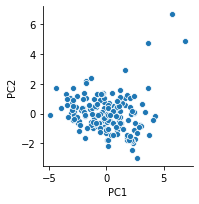

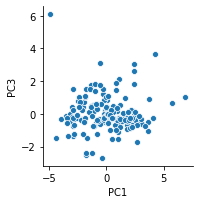

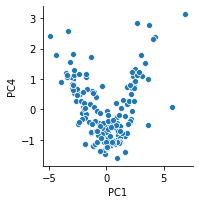

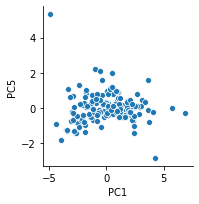

In [28]:
# plotting pairplt tosee spread of data after outlier removal
fig = plt.figure(figsize = (12,6))
list1=["PC2","PC3","PC4","PC5"]
for x in list1:
    sns.pairplot(data=PC_country, x_vars=["PC1"], y_vars=[x], size=3)
    plt.plot()

### even after removing the outliers there is no significance change in the scatter plots of the data and hence this shows that maximum variance is explained by the pca

In [29]:
PC_df_2.shape

(142, 5)

##### Here we are left with countries having within 95 percentage of  colun values . after this we are left with some 142 country data insted of the 167 countries that we have previously.

## Performing K-Means clustering on the data.

In [30]:
# From SKlearn we are import kmeans
from sklearn.cluster import KMeans

### Calculating  Hopkins statistics

In [31]:
# code for calculating Hopkins statistics
import numpy as np
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from math import isnan
from random import sample

 
def hopkins(X):
    d = X.shape[1]
    n = len(X) 
    m = int(0.1 * n)
    
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 4), m)
 
    ujd = []
    wjd = []
    
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
# Calculating hopkinsscore for the PC_df_2
hopkins(PC_df_2)

0.7339878138099712

### The calculated hopkins_score is above .50 and is  good score.
### According to this obtained score we can observe that  the data is having  tendency to form the clusters.

##  Silhouette score analysis

In [33]:
# importing silhouette_score from sklearn.metrics
PC_df_3=PC_df_2
from sklearn.metrics import silhouette_score
list1= []
for x in range(2, 10):
    kmeans = KMeans(n_clusters=x).fit(PC_df_3)
    list1.append([x, silhouette_score(PC_df_3, kmeans.labels_)])

### Plotting Silhouette coeff curve

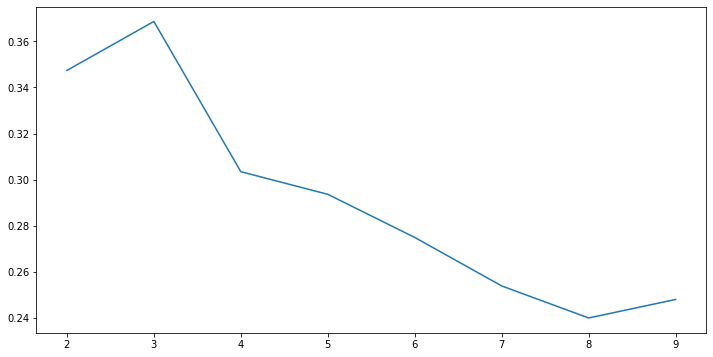

In [34]:
# graph b/w the Silhouette_coeff & no._of_clusters  
fig = plt.figure(figsize = (12,6))
plt.plot(pd.DataFrame(list1)[0], pd.DataFrame(list1)[1])

#### By analysing we find that at K = 3 the number of clusters that can be formed by using KMEANS algorith.

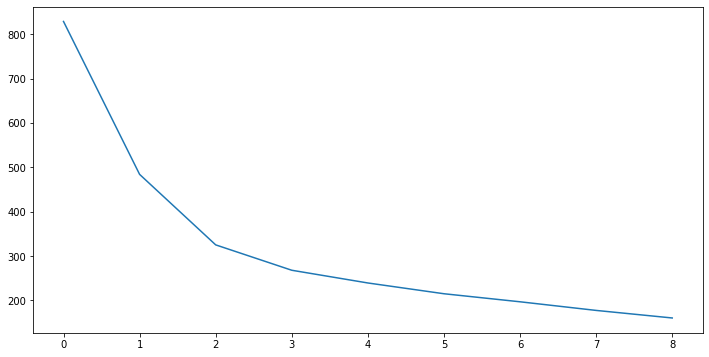

In [35]:
fig = plt.figure(figsize = (12,6))
list2= []
for num_clusters in list(range(1,10)):
    clust = KMeans(n_clusters = num_clusters, max_iter=50)
    clust.fit(PC_df_3)
    list2.append(clust.inertia_)
plt.plot(list2)

#### By using elbow curve method we observe that there is a  distinct bend at approx. 3 clusters.
#### For this reason we choose K = 3
#### By taking three clusters & performing the KMeans algooritm.

In [36]:
clusters_3 = KMeans(n_clusters = 3, max_iter=50,random_state = 47)
clusters_3.fit(PC_df_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=47, tol=0.0001, verbose=0)

In [37]:
# here we add the cluster label column on right side

PC_df_4=PC_df_2
PC_df_4.index = pd.RangeIndex(len(PC_df_4.index))
PC_df_KM = pd.concat([PC_df_4, pd.Series(clusters_3.labels_)], axis=1)
PC_df_KM.columns = ['PC1', 'PC2','PC3','PC4','PC5','Clusters']
PC_df_KM.head()

,PC1,PC2,PC3,PC4,PC5,Clusters
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1


#### observing and countingthe no. members in each clusters

In [38]:
PC_df_KM['Clusters'].value_counts()

1    78
0    41
2    23
Name: Clusters, dtype: int64

[]

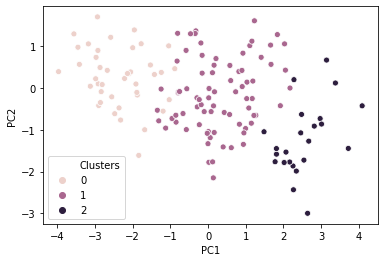

In [39]:
# Scatter plot to check the formation of the clusters

sns.scatterplot(x='PC1',y='PC2',hue='Clusters',legend='full',data=PC_df_KM)
plt.plot()

[]

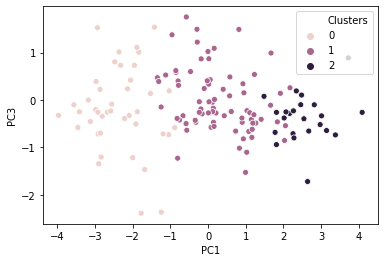

In [40]:
sns.scatterplot(x='PC1',y='PC3',hue='Clusters',legend='full',data=PC_df_KM)
plt.plot()

[]

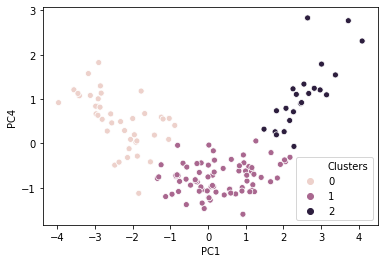

In [41]:
sns.scatterplot(x='PC1',y='PC4',hue='Clusters',legend='full',data=PC_df_KM)
plt.plot()

[]

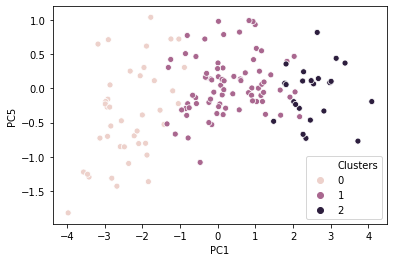

In [42]:
sns.scatterplot(x='PC1',y='PC5',hue='Clusters',legend='full',data=PC_df_KM)
plt.plot()

####  There are various types of clusters are formed for further analysis we take the first scatter plot for further analysis

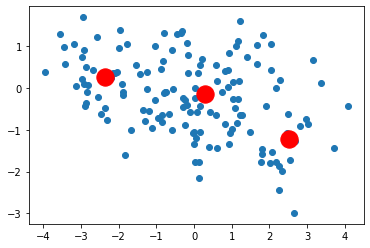

In [43]:
# Observing the clustercenters formed 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(PC_df_KM)
plt.scatter(PC_df_KM.PC1,PC_df_KM.PC2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### By taking four clusters & performing the KMeans algooritm

In [44]:
clusters_4= KMeans(n_clusters = 4, max_iter=50,random_state = 47)
clusters_4.fit(PC_df_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=47, tol=0.0001, verbose=0)

In [45]:
# here we add the cluster label column on right side

PC_df_5=PC_df_2
PC_df_5.index = pd.RangeIndex(len(PC_df_5.index))
PC_df_6 = pd.concat([PC_df_5, pd.Series(clusters_4.labels_)], axis=1)
PC_df_6.columns = ['PC1', 'PC2','PC3','PC4','PC5','Clusters']
PC_df_6.head()

,PC1,PC2,PC3,PC4,PC5,Clusters
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,1
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,3
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,1
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,3


#### observing and countingthe no. members in each clusters


In [46]:
PC_df_6['Clusters'].value_counts()

2    41
3    40
1    39
0    22
Name: Clusters, dtype: int64

#### Scatterplot for cluster formations

In [47]:
# Scatter plot to check the formation of various clusters 

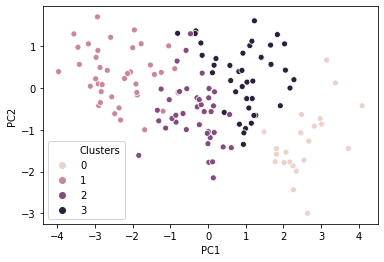

In [48]:
sns.scatterplot(x='PC1',y='PC2',hue='Clusters',legend='full',data=PC_df_6)

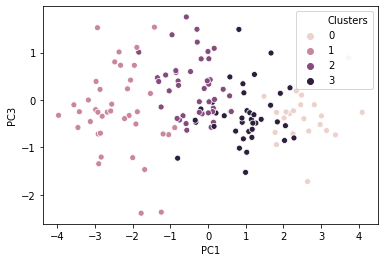

In [49]:
sns.scatterplot(x='PC1',y='PC3',hue='Clusters',legend='full',data=PC_df_6)

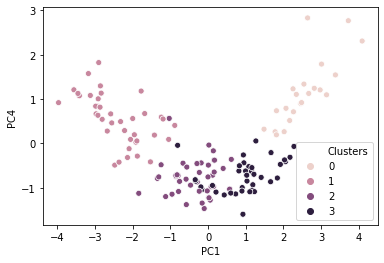

In [50]:
sns.scatterplot(x='PC1',y='PC4',hue='Clusters',legend='full',data=PC_df_6)

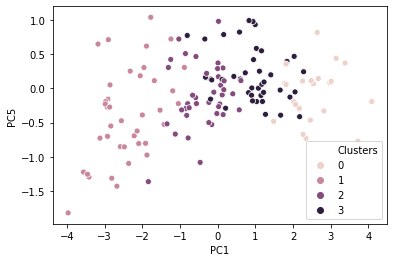

In [51]:
sns.scatterplot(x='PC1',y='PC5',hue='Clusters',legend='full',data=PC_df_6)

#### Here you can observe in the scatter plots when we try to form the four clusters then in the first scatter plot it forms perfectly but in the rest the of the plots the clusters are not clearly visible. 

####  There are various types of clusters are formed for further analysis we take the first scatter plot for further analysis

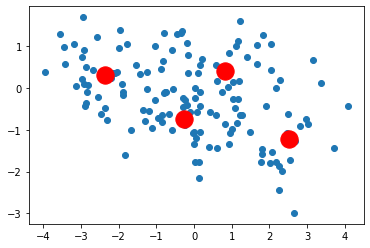

In [52]:
# Observing the clustercenters formed 
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y2 = kmeans.fit_predict(PC_df_KM)
plt.scatter(PC_df_6.PC1,PC_df_6.PC2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

## Performing hierarchical clustering

#### here we are performing singlelinkage

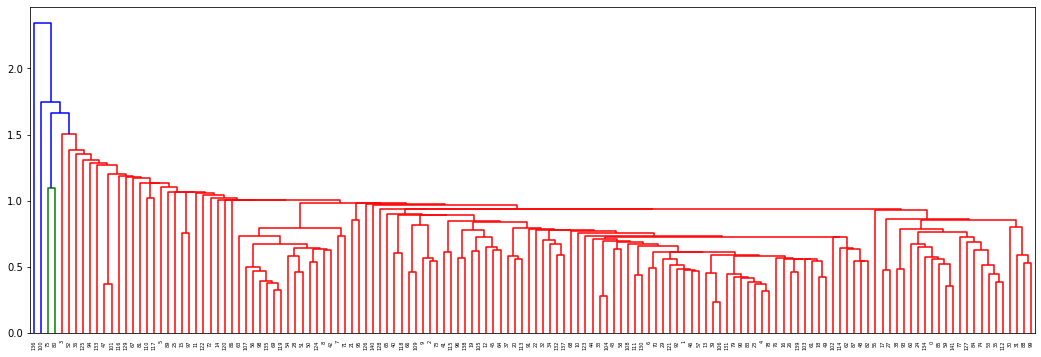

In [53]:
fig = plt.figure(figsize = (18,6))
x = linkage(PC_df_2, method="single", metric='euclidean')
dendrogram(x)

plt.show()

### In the above figure the clusters are not form properly .i.e observe the red and green branches the proportion is not good hence the clustering process not perform well with the help of the single linkage

#### here we are performing complete linkage

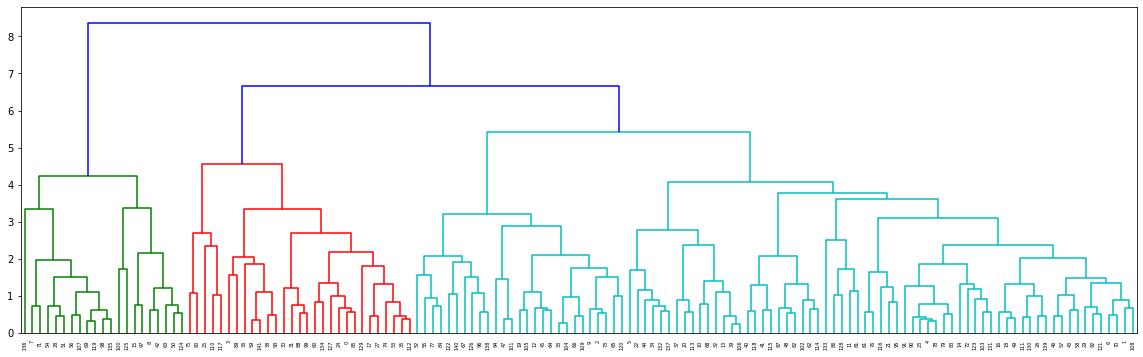

In [54]:
fig = plt.figure(figsize = (20,6))
x = linkage(PC_df_2, method="complete", metric='euclidean')
dendrogram(x)

plt.show()

#### Now we are selecting three clusters based on the above dendogram 


In [55]:
labelfor_cluster = cut_tree(x, n_clusters=3).reshape(-1, )
labelfor_cluster

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 2, 2, 1, 1, 1, 1, 0])

In [56]:
# cgiving labels for the cluster (as a colun)

PC_df_2['labelfor_cluster'] = labelfor_cluster
PC_df_2.head()

,PC1,PC2,PC3,PC4,PC5,labelfor_cluster
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1


#### observing and countingthe no. members in each clusters


In [57]:
PC_df_2['labelfor_cluster'].value_counts()

1    92
0    29
2    21
Name: labelfor_cluster, dtype: int64

### cluster belongs to label-1 is having most of the datapoints.

#### here we are plotting of PC1 v/s PC2 having labelfor_cluster hue 

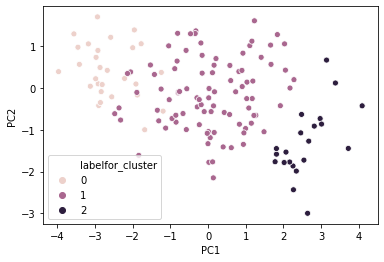

In [58]:
# checking the formation of cluster
sns.scatterplot(x='PC1',y='PC2',hue='labelfor_cluster',legend='full',data=PC_df_2)

### here we observe the formation of cluster clearly.

In [59]:
# Concate previous dataframe in order to perform further analysis

main_df = pd.concat([country_data,PC_df_2], axis=1)
main_df = pd.concat([main_df,y], axis=1)
main_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,labelfor_cluster,country
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0.0,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1.0,Albania
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1.0,Algeria
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932423,1.695555,1.525044,0.839625,-0.273209,0.0,Angola
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1.0,Antigua and Barbuda


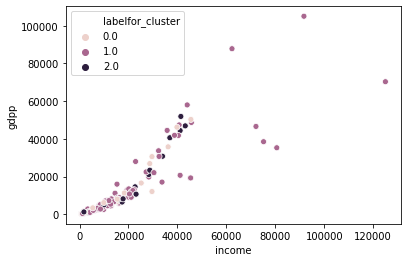

In [60]:
# scatter plot Income v/s GDP 
# In this graph we are taking hue of 'labelfor_cluster'
sns.scatterplot(x='income',y='gdpp',hue='labelfor_cluster',legend='full',data=main_df)

###### By observing the above graph we observe that the income & GDP of people are  very positively coorelated variables 
##### This the very common relationship as GDP of  country is high then  income of people of  country will also high.

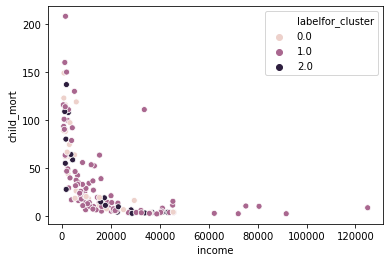

In [61]:
# scatter income v/s child mortality
# In this graph we are taking hue of 'labelfor_cluster'

sns.scatterplot(x='income',y='child_mort',hue='labelfor_cluster',legend='full',data=main_df)

###### By observing the above graph we observe that the income & childmortality are  not positively coorelated variables. 

##### In this the childmortality is low in a country then  income of people of  country will  high and vice versa.

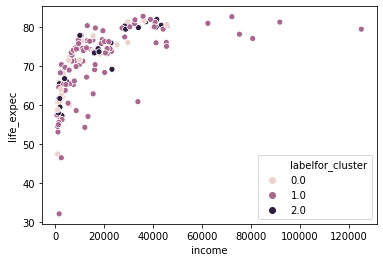

In [62]:
# scatter income v/s life_expec
# In this graph we are taking hue of 'labelfor_cluster'

sns.scatterplot(x='income',y='life_expec',hue='labelfor_cluster',legend='full',data=main_df)

###### By observing the above graph we observe the relation among the income &  life expentacy variables. 
##### as the income is low then the life expentacy is relatively low but when we increase the income from about 10000 then life expetecy will increase significantly and become constant as the income increases.

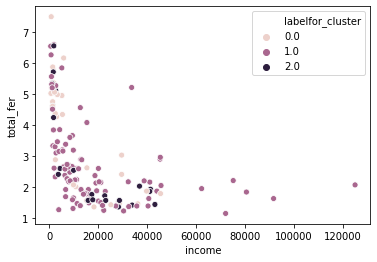

In [63]:
# scatter income v/s total_fer
# In this graph we are taking hue of 'labelfor_cluster'

sns.scatterplot(x='income',y='total_fer',hue='labelfor_cluster',legend='full',data=main_df)

###### By observing the above graph we observe that the income & total fertility are  not positively coorelated variables. 
##### In this the totalfertility is low in a country then income of people of  country will  high and vice versa.


## Here we will use "main_df" dataframe which is obtain after further processing of the dataframe obtained after performing Hierarchical clustering.

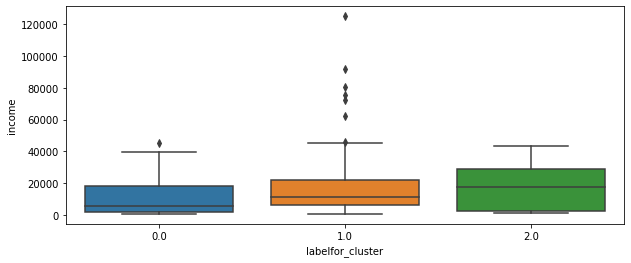

In [64]:
# boxplot for analysisng the income & clusters 
# based on Hierarchical clustering

fig = plt.figure(figsize = (10,4))
sns.boxplot(x='labelfor_cluster', y='income', data=main_df)

#### according to the box plot the avg income for label cluster-2 is comparitively more than other clusters

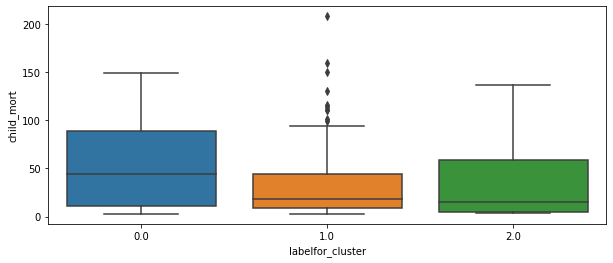

In [65]:
# boxplot for analysisng the childmortality & clusters 
# based on Hierarchical clustering
fig = plt.figure(figsize = (10,4))
sns.boxplot(x='labelfor_cluster', y='child_mort', data=main_df)

#### according to the box plot the avg child mortality for label cluster-0 is comparitively more than other clusters

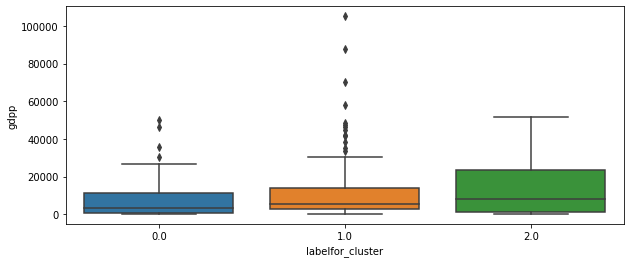

In [66]:
# boxplot for analysisng the gdp & clusters 
# based on Hierarchical clustering

fig = plt.figure(figsize = (10,4))
sns.boxplot(x='labelfor_cluster', y='gdpp', data=main_df)

#### according to the box plot the avg gdp for label cluster-2 is comparitively more than other clusters

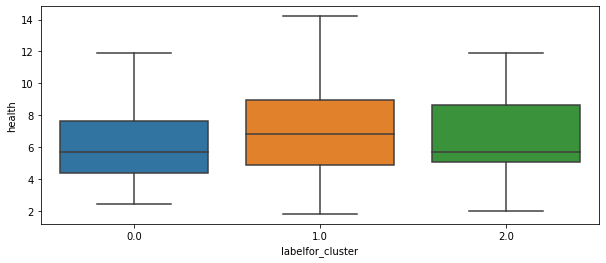

In [67]:
# boxplot for analysisng the health & clusters 
# based on Hierarchical clustering

fig = plt.figure(figsize = (10,4))
sns.boxplot(x='labelfor_cluster', y='health', data=main_df)

#### according to the box plot the avg health for label cluster-2 is comparitively more than other clusters

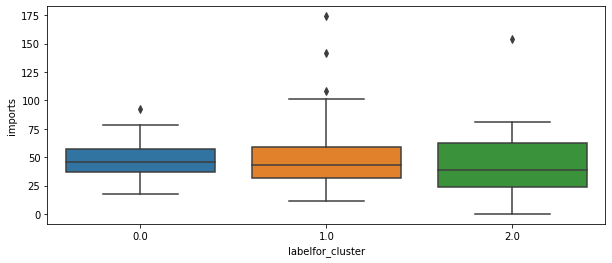

In [68]:
# boxplot for analysisng the imports & clusters 
# based on Hierarchical clustering

fig = plt.figure(figsize = (10,4))
sns.boxplot(x='labelfor_cluster', y='imports', data=main_df)

#### according to the box plot the avg imports for all label clusters is comparitively same but for label cluster-1 the over all imports are more due to present of outliers. 

## Here we will use "PC_df_KM" dataframe which is obtain after further processing of the dataframe obtained after performing KMeans clustering.

In [69]:
# creating combine data frame using country df concatinating with df obtain after doing kmean clustring.
km_df_country = pd.concat([PC_df_KM,y], axis=1)

# creating combine data frame using km_df_country dataframe and restof the datframe
km_df_country = pd.concat([km_df_country, country_data], axis = 1)
km_df_country.head()

,PC1,PC2,PC3,PC4,PC5,Clusters,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0.0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1.0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1.0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0.0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1.0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


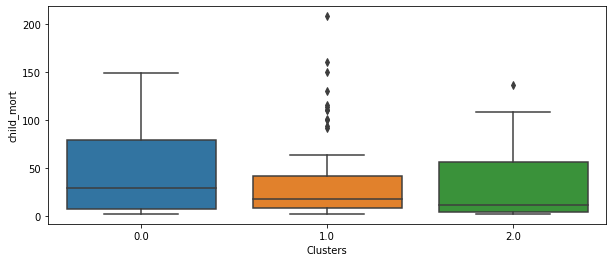

In [70]:
# boxplot for analysisng the child mortality & clusters 
# based on KMeanclustering
fig = plt.figure(figsize = (10,4))
sns.boxplot(x='Clusters',y='child_mort',data=km_df_country)

#### according to the box plot the avg childmortality for cluster-0 is comparitively more than other clusters

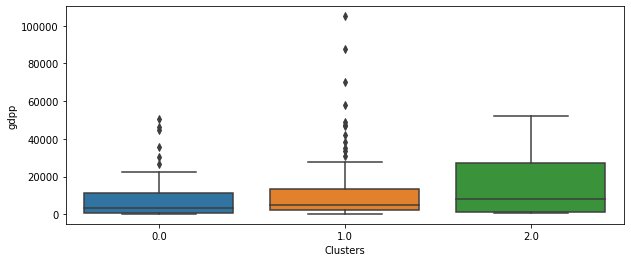

In [71]:
# boxplot for analysisng the gdp & clusters 
# based on KMeanclustering
fig = plt.figure(figsize = (10,4))
sns.boxplot(x='Clusters', y='gdpp', data=km_df_country)

#### according to the box plot the avg gdp for cluster-2 is comparitively more than other clusters

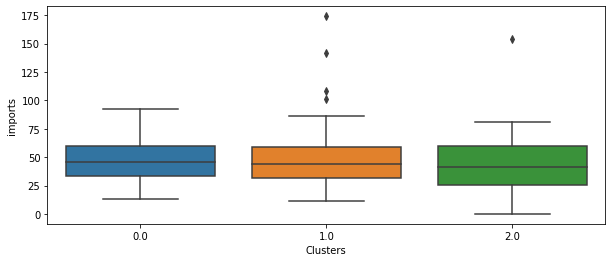

In [72]:
# boxplot for analysisng the imports & clusters 
# based on KMeanclustering

fig = plt.figure(figsize = (10,4))
sns.boxplot(x='Clusters', y='imports', data=km_df_country)

#### according to the box plot the avg imports for all clusters is comparitively same.

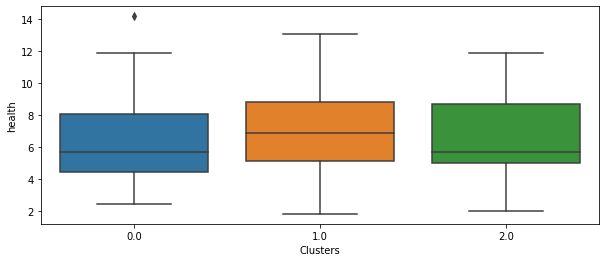

In [73]:
# boxplot for analysisng the health & clusters 
# based on KMeanclustering

fig = plt.figure(figsize = (10,4))
sns.boxplot(x='Clusters', y='health', data=km_df_country)

#### according to the box plot the avg health for label cluster-1 is comparitively more than other clusters

In [74]:
# analyzing countries present in cluster-0 (hierrahealclustering)
y =  main_df['labelfor_cluster']==0.0
main_df[y]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,labelfor_cluster,country
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0.0,Afghanistan
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,-2.932423,1.695555,1.525044,0.839625,-0.273209,0.0,Angola
17,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,-2.672314,0.418172,-0.257368,0.278672,-1.431768,0.0,Benin
24,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,-3.122053,0.038775,-0.455751,1.080918,-0.728128,0.0,Bulgaria
25,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,-2.898971,-0.422663,-1.347413,1.821474,0.712117,0.0,Burkina Faso
27,44.4,54.1,5.68,59.5,2520,3.120,66.1,2.88,786,-2.807909,0.078649,-0.342961,0.543557,-1.314868,0.0,Cambodia
30,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,-3.964964,0.386619,-0.323557,0.918301,-1.822389,0.0,Cape Verde
31,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,-3.557555,1.289128,-0.103015,1.208406,-1.224562,0.0,Central African Republic
35,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,-2.093556,0.343601,-0.328381,-0.118947,-0.808030,0.0,Colombia
36,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,-3.173370,1.050382,-0.001219,1.574210,0.647909,0.0,Comoros


In [75]:
# analyzing countries present in cluster-1 (herarchelclustering)
z =  main_df['labelfor_cluster']==1.0
main_df[z]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,labelfor_cluster,country
1,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1.0,Albania
2,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1.0,Algeria
4,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1.0,Antigua and Barbuda
5,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0.022407,-1.779187,0.869997,-0.036967,0.981057,1.0,Argentina
6,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,-0.101584,-0.568252,0.242092,-1.466266,-0.055992,1.0,Armenia
9,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,-0.181487,-0.402866,0.867459,-0.438773,0.137350,1.0,Azerbaijan
10,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,1.268744,-0.656588,-0.488098,0.055634,-0.380250,1.0,Bahamas
11,8.6,69.50,4.97,50.9,41100,7.440,76.0,2.16,20700,1.670996,0.561162,0.991258,-0.207080,-0.392572,1.0,Bahrain
12,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,-1.123851,-0.961397,0.526615,-1.197201,-0.669166,1.0,Bangladesh
13,14.2,39.50,7.97,48.7,15300,0.321,76.7,1.78,16000,1.081374,-0.481970,-0.664355,-0.522505,0.002624,1.0,Barbados


In [76]:
# analyzing countries present in cluster-2 (herarchelclustering)
x = main_df['labelfor_cluster']==2.0
main_df[x]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,labelfor_cluster,country
7,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900,2.342165,-1.988459,0.190344,1.105038,-0.731192,2.0,Australia
8,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,2.973764,-0.734689,-0.519766,1.205442,0.083580,2.0,Austria
15,4.5,76.400,10.70,74.7000,41100,1.880,80.0,1.86,44400,3.143786,0.663548,-0.645228,1.094898,0.439734,2.0,Belgium
28,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,2.543631,-1.727095,-0.396281,1.336853,0.065723,2.0,Cameroon
42,3.6,50.200,5.97,57.5000,33900,2.010,79.9,1.42,30800,3.010492,-0.865549,-0.335752,1.787223,0.102687,2.0,Cyprus
50,55.2,4.790,2.66,23.3000,1420,11.600,61.7,4.61,482,2.458960,-1.076143,-0.100439,0.899328,-0.464733,2.0,Eritrea
51,4.5,75.100,6.03,68.7000,22700,1.740,76.0,1.72,14600,2.254271,-1.866638,-0.711988,1.230005,0.107391,2.0,Estonia
54,4.2,26.800,11.90,28.1000,36900,1.050,81.4,2.03,40600,2.671422,-1.273610,-0.656171,1.125993,0.143391,2.0,France
56,80.3,23.800,5.69,42.7000,1660,4.300,65.5,5.71,562,1.779493,-1.765397,-0.684198,0.262702,0.075643,2.0,Gambia
63,109.0,30.300,4.93,43.2000,1190,16.100,58.0,5.34,648,2.480924,-0.634702,0.103795,0.919853,0.112795,2.0,Guinea


### After analysis of data & applying KMeans & Hierarchical clustering we observe slightly different results as mension below :

#### After performing KMeans clustering we get

- 41 no. of countries are present in cluster-0

- 78 no. of countries are present in cluster-1

- 23 no. of countries are present in cluster-2

#### After performing Hierarchical clustering we get :

- 29 no. of countries are present in cluster-0

- 92 no. of countries are present in cluster-1

- 21 no. of countries are present in cluster-2


### After analysis we are opting for the hierarchial clustering method as there is comparitively low data points in the cluster_0 as compare to Kmeans clustering. In the problem statement it is mentioned that we have to do analysis by considering some features only soch as GDP, INCOME & CHILD MORTALITY RATE. So I will now group the countries acoording to the child mortality rate, GDP and income of the country.

### According to the above tables for cluster-0 (hierarrichal clustering) the top five countries that require dire need aid are:
- Central Afrian Republic (having 149 child mortality)
- Niger                   (having 123 child mortality)
- Angola                  (having 119 child mortality)
- Burkina Faso            (having 116 child mortality)
- Benin                   (having 111 child mortality)



### According  to the above tables for cluster-1 (hierarrichal clustering) the top five countries that require dire need aid are:
- Sierra Leone            (having 160 child mortality)
- Chad                    (having 150 child mortality)
- Nigerria                (having 130 child mortality)
- Congo demo rep          (having 116 child mortality)
- Cote d Ivoire           (having 111 child mortality)







### According  to the above tables for cluster-2 (hierarrichal clustering) the top five countries that require dire need aid are:
- Malli                   (having 137 child mortality)
- Guinea                  (having 109 child mortality)
- Cameron                 (having 108 child mortality)
- Gambia                  (having 80  child mortality)
- Myanmar                 (having 64  child mortality)



### These are the top countries that are in dire need of aid are:
    
- Chad (having 150 child mortality)
- Sierra Leone (having 160 child mortality)
- Central Afrian Republic (having 149 child mortality)
- Malli (having 137 child mortality)
- Nigerria (having 130 child mortality)
- Niger (having 123 child mortality)
- Angola (having 119 child mortality)
- Burkina Faso (having 116 child mortality)
- Congo demo rep (having 116 child mortality)
- Benin (having 111 child mortality)
- Cote d Ivoire (having 111 child mortality)
- Guinea (having 109 child mortality)
- Cameron (having 108 child mortality)
- Gambia (having 80 child mortality)
- Myanmar (having 64 child mortality)





### OBSERVATION: Here the child mortality rate is very high  on the other hand GDP, income of  people is very low this will definately play an important role for the high child mortality rate. These countries seriously need financial aid so that they bring down the child mortality rate.